In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [4]:
digits = load_digits()
X = digits.data
y = digits.target

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [11]:
clf_tree = DecisionTreeClassifier()
scores = np.mean(cross_val_score(clf_tree, X, y, cv=10, n_jobs=-1))

In [12]:
def write_answer_1(scores):
    with open('answer_1.txt', 'w') as fout:
        fout.write(str(scores))

In [13]:
write_answer_1(scores)

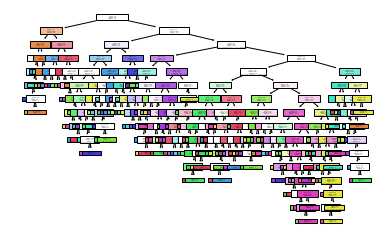

In [18]:
clf = clf_tree.fit(X, y)
plot_tree(clf, filled=True);

In [19]:
from sklearn.ensemble import BaggingClassifier

In [20]:
clf_bag = BaggingClassifier(n_estimators=100)

In [21]:
scores_bag = np.mean(cross_val_score(clf_bag, X, y, cv=10, n_jobs=-1))

In [22]:
scores_bag

0.9248819239723896

In [23]:
with open('answer_2.txt', 'w') as fout:
    fout.write(str(scores_bag))

In [30]:
clf_bag = BaggingClassifier(max_features=8, n_estimators=100)

In [31]:
scores_bag_m = np.mean(cross_val_score(clf_bag, X, y, cv=10, n_jobs=-1))

In [32]:
scores_bag_m

0.9383114347716924

In [33]:
with open('answer_3.txt', 'w') as fout:
    fout.write(str(scores_bag_m))

In [80]:
base_clf = DecisionTreeClassifier(max_features=8)
clf_bagging = BaggingClassifier(base_estimator=base_clf, 
                                n_estimators=100)

In [81]:
scores_bagging = np.mean(cross_val_score(clf_bagging, X, y, cv=10, n_jobs=-1))

In [82]:
scores_bagging

0.9499920937829966

In [83]:
with open('answer_4.txt', 'w') as fout:
    fout.write(str(scores_bagging))

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
clf_rf = RandomForestClassifier(n_estimators=100, max_features=8)

In [92]:
scores_rf = np.mean(cross_val_score(clf_rf, X, y, cv=10, n_jobs=-1))

In [93]:
scores_rf

0.951677886849688

In [98]:
np.arange(5, 150, 5)

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145])

In [101]:
number_of_estimators = np.arange(5, 150, 5)
number_of_features = 8
scores_estimators = []
for n in number_of_estimators:
    print(n)
    clf = RandomForestClassifier(n_estimators=n, max_features=number_of_features)
    scores_estimators.append(cross_val_score(clf, X, y, cv = 10).mean())

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145


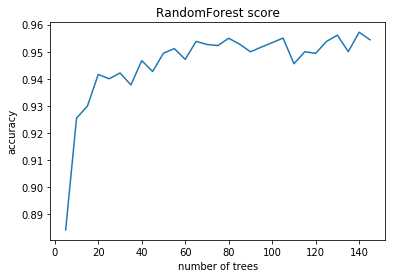

In [102]:
plt.plot(number_of_estimators, scores_estimators)
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.title('RandomForest score');